In [ ]:
import os 
from pathlib import Path
import shutil
import pandas as pd 

In [4]:
df = pd.read_csv("/home/camarada/Documents/CDE/thesis/dataset_raw/DATASET/NC/dugong_environmental_variables_NC.csv")

In [3]:
df['stem_filename'] = df['label_name'].apply(lambda x:Path(x).stem)


In [5]:
df.shape

(3546, 25)

In [7]:
df['stem_filename'] = df['label_name'].apply(lambda x: Path(x).stem)
    
# Ensure it don't have duplicates and set the index to the stem string
# drop duplicates one row per image
df_mapped = df.drop_duplicates(subset=['stem_filename'], keep='first')
df_mapped = df_mapped.select_dtypes(include=['str']).fillna('Pas')

In [21]:
df_mapped.isnull().sum()

label_name               0
turbidity_local          0
sun_glitter              0
cloud_reflection         0
habitat_type             0
background_dugong        0
background_complexity    0
dugong_position          0
calf_presence            0
calf                     0
group                    0
coral                    0
sand                     0
dense_seagrass           0
open_sea                 0
sparse_seagrass          0
stem_filename            0
dtype: int64

In [22]:
df_mapped

label_name turbidity_local sun_glitter  \
0     GH014205-611f8c7997ea4_1808.txt              no        0-25   
1     GH014205-611f8c7997ea4_1809.txt              no        0-25   
2     GH014205-611f8c7997ea4_1811.txt              no        0-25   
3     GH014205-611f8c7997ea4_1812.txt              no        0-25   
4     GH014205-611f8c7997ea4_1813.txt              no        0-25   
...                               ...             ...         ...   
3541   GH034199-60f003063f521_921.txt              no           0   
3542   GH034199-60f003063f521_922.txt              no           0   
3543   GH034199-60f003063f521_923.txt              no           0   
3544   GH044199-60f13cee9be1c_446.txt              no           0   
3545   GH044199-60f13cee9be1c_447.txt              no           0   

     cloud_reflection habitat_type background_dugong background_complexity  \
0                0-25        coral             coral                medium   
1                0-25        coral             coral                medium   
2                0-25        coral             coral                medium   
3                0-25        coral             coral                medium   
4                0-25        coral             coral                medium   
...               ...          ...               ...                   ...   
3541              >50        coral             coral                  high   
3542              >50        coral             coral                  high   
3543              >50        coral             coral                  high   
3544             0-25        coral              sand                  high   
3545             0-25        coral              sand                  high   

     dugong_position calf_presence calf  group coral sand dense_seagrass  \
0          water_col            no   no  alone     P    P              A   
1          water_col            no   no  alone     P    P              A   
2          water_col            no   no  alone     P    P              A   
3          water_col            no   no  alone     P    P              A   
4          water_col            no   no  alone     P    P              A   
...              ...           ...  ...    ...   ...  ...            ...   
3541       water_col            no   no  alone     P    A              A   
3542       water_col            no   no  alone     P    A              A   
3543       water_col            no   no  alone     P    A              A   
3544         surface            no   no  alone     P    P              A   
3545         surface            no   no  alone     P    P              A   

     open_sea sparse_seagrass                stem_filename  
0           P               A  GH014205-611f8c7997ea4_1808  
1           P               A  GH014205-611f8c7997ea4_1809  
2           P               A  GH014205-611f8c7997ea4_1811  
3           P               A  GH014205-611f8c7997ea4_1812  
4           P               A  GH014205-611f8c7997ea4_1813  
...       ...             ...                          ...  
3541        P               A   GH034199-60f003063f521_921  
3542        P               A   GH034199-60f003063f521_922  
3543        P               A   GH034199-60f003063f521_923  
3544        A               A   GH044199-60f13cee9be1c_446  
3545        A               A   GH044199-60f13cee9be1c_447  

[716 rows x 17 columns]

In [ ]:
list_medatata_columns = ['altitude',
                            'resolution', 'sea_state', 'turbidity_global', 
                            'turbidity_local', 'sun_glitter', 'cloud_reflection',
                            'habitat_type', 'background_complexity', 'coral', 'sand', 'dense_seagrass',
                            'open_sea','sparse_seagrass','stem_filename'
                            ]

df[list_medatata_columns].drop_duplicates(subset=['stem_filename'],keep='first')

altitude  resolution  sea_state  turbidity_global turbidity_local  \
0          NaN         NaN          1                 1              no   
1          NaN         NaN          1                 1              no   
2          NaN         NaN          1                 1              no   
3          NaN         NaN          1                 1              no   
4          NaN         NaN          1                 1              no   
...        ...         ...        ...               ...             ...   
3541       NaN         NaN          0                 1              no   
3542       NaN         NaN          0                 1              no   
3543       NaN         NaN          0                 1              no   
3544       NaN         NaN          1                 2              no   
3545       NaN         NaN          1                 2              no   

     sun_glitter cloud_reflection habitat_type background_complexity  group  \
0           0-25             0-25        coral                medium  alone   
1           0-25             0-25        coral                medium  alone   
2           0-25             0-25        coral                medium  alone   
3           0-25             0-25        coral                medium  alone   
4           0-25             0-25        coral                medium  alone   
...          ...              ...          ...                   ...    ...   
3541           0              >50        coral                  high  alone   
3542           0              >50        coral                  high  alone   
3543           0              >50        coral                  high  alone   
3544           0             0-25        coral                  high  alone   
3545           0             0-25        coral                  high  alone   

     coral sand dense_seagrass open_sea sparse_seagrass  \
0        P    P              A        P               A   
1        P    P              A        P               A   
2        P    P              A        P               A   
3        P    P              A        P               A   
4        P    P              A        P               A   
...    ...  ...            ...      ...             ...   
3541     P    A              A        P               A   
3542     P    A              A        P               A   
3543     P    A              A        P               A   
3544     P    P              A        A               A   
3545     P    P              A        A               A   

                    stem_filename  
0     GH014205-611f8c7997ea4_1808  
1     GH014205-611f8c7997ea4_1809  
2     GH014205-611f8c7997ea4_1811  
3     GH014205-611f8c7997ea4_1812  
4     GH014205-611f8c7997ea4_1813  
...                           ...  
3541   GH034199-60f003063f521_921  
3542   GH034199-60f003063f521_922  
3543   GH034199-60f003063f521_923  
3544   GH044199-60f13cee9be1c_446  
3545   GH044199-60f13cee9be1c_447  

[716 rows x 16 columns]

In [ ]:
###
## MOVE all folders to a unified file folder images labels

parent_folder = "/home/camarada/Documents/CDE/thesis/dataset_raw/DATASET/NC"

## make a dir to hold all images
savedir = 'images'
savedir_lab = 'labels'
save_dir_yolo = 'labels_yolo'
os.makedirs(os.path.join(parent_folder,savedir), exist_ok=True)
os.makedirs(os.path.join(parent_folder,savedir_lab), exist_ok=True)
os.makedirs(os.path.join(parent_folder,save_dir_yolo), exist_ok=True)

## 
for dir in os.listdir(parent_folder):
    print(f"Dir:{dir}")
    ## each folder has three folders with images, labels and labels_yolo
    dir_path = os.path.join(parent_folder, dir)

    if os.path.isdir(dir_path) and dir != "images" and dir != 'labels' and dir != 'labels_yolo':

        ## move images
        image_dir_path = os.path.join(dir_path,'images')
        for file in os.listdir(image_dir_path):
            src = os.path.join(dir_path,'images', file)
            dst = os.path.join(parent_folder, savedir, file)
            shutil.move(src, dst)

        ## move labels
        labels_dir_path = os.path.join(dir_path,'labels')
        for file in os.listdir(labels_dir_path):
            src = os.path.join(dir_path,'labels', file)
            dst = os.path.join(parent_folder, savedir_lab, file)
            shutil.move(src, dst)
        
        ## yolo labels
        yolo_dir_path = os.path.join(dir_path,'labels_yolo')
        for file in os.listdir(yolo_dir_path):
            src = os.path.join(dir_path,'labels_yolo', file)
            dst = os.path.join(parent_folder, save_dir_yolo, file)
            shutil.move(src, dst)

        

Dir:Flight_200
Dir:labels_yolo
Dir:Flight_222
Dir:Flight_207
Dir:Flight_213
Dir:Flight_232
Dir:Flight_196
Dir:Flight_231
Dir:Flight_235
Dir:Flight_214
Dir:Flight_219


Dir:Flight_199
Dir:Flight_197
Dir:Flight_226
Dir:Flight_212
Dir:images
Dir:Flight_211
Dir:Flight_218
Dir:Flight_234
Dir:Flight_233
Dir:dugong_environmental_variables_NC.csv
Dir:Flight_195
Dir:labels
Dir:Flight_209
Dir:Flight_198
Dir:Flight_215
Dir:Flight_220
Dir:Flight_205
Dir:Flight_225


In [ ]:
os.walk()

In [25]:
for root, dirs, files in os.walk("/home/camarada/Documents/CDE/thesis/dataset_raw/DATASET"):
    print("Current folder:", root)
    print("Subfolders:", dirs)
    print("Files:", files)

Current folder: /home/camarada/Documents/CDE/thesis/dataset_raw/DATASET
Subfolders: ['WP', 'NC']
Files: ['DOCUMENTATION DATASET.docx']
Current folder: /home/camarada/Documents/CDE/thesis/dataset_raw/DATASET/WP
Subfolders: ['UM', 'GAM', 'MANTASANDY', 'FRIWEN']
Files: ['dugong_environmental_variables_WP.xlsx']
Current folder: /home/camarada/Documents/CDE/thesis/dataset_raw/DATASET/WP/UM
Subfolders: ['UM_M5', 'UM_M2', 'images', 'UM_M6', 'UM_M3', 'UM_M1']
Files: []
Current folder: /home/camarada/Documents/CDE/thesis/dataset_raw/DATASET/WP/UM/UM_M5
Subfolders: ['labels_yolo', 'images', 'labels']
Files: []
Current folder: /home/camarada/Documents/CDE/thesis/dataset_raw/DATASET/WP/UM/UM_M5/labels_yolo
Subfolders: []
Files: ['MAN_P4_UM_M5_F2_GSP_DJI_0221-657c57e81272f_78.txt', 'MAN_P4_UM_M5_F2_GSP_DJI_0221-657c57e81272f_288.txt', 'MAN_P4_UM_M5_F2_GSP_DJI_0221-657c57e81272f_119.txt', 'MAN_P4_UM_M5_F2_GSP_DJI_0221-657c57e81272f_313.txt', 'MAN_P4_UM_M5_F2_GSP_DJI_0221-657c57e81272f_388.txt', 'MAN

In [3]:
def find_sub_data_sources(base_dir):
    """
    Finds all 'images' folders and their sibling 'labels_yolo' folders 
    within a nested structure.
    """
    sources = []
    base_path = Path(base_dir)
    
    # We look for all directories named 'images' regardless of how deep they are
    for img_dir in base_path.rglob("images"):
        # The parent is the mission folder (e.g., UM_M5)
        parent_dir = img_dir.parent
        label_dir = parent_dir / "labels_yolo"
        parent_1 = img_dir.parent.parent
        parent_2 = img_dir.parent.parent.parent

        if parent_1.name == "NC":
            region = parent_1.name
            subregion = "None"

        elif parent_2.name == "WP":
            region = parent_2.name
            subregion = parent_1.name
        else:
            region = "Unknown"
            subregion = "Unknown"
        
        if label_dir.exists():
            sources.append({
                "images": str(img_dir),
                "labels": str(label_dir),
                "mission_name": parent_dir.name, # e.g., 'UM_M5'
                "subregion": subregion, # e.g., 'GAM'
                "region": region # WP or NC
            })
    return sources

data_sources = find_sub_data_sources("/home/camarada/Documents/CDE/thesis/dataset_raw/DATASET")

In [2]:
data_sources[0]

NameError: name 'data_sources' is not defined

In [1]:
data_sources[0]

NameError: name 'data_sources' is not defined

In [35]:
import pandas as pd

In [38]:
! uv pip install openpyxl

Using Python 3.11.14 environment at: /home/camarada/venv/fifty/.venv
Resolved 2 packages in 365ms                                         
⠙ Preparing packages... (0/2)                                                   
⠙ Preparing packages... (0/2)-------------------     0 B/17.64 KiB           
⠙ Preparing packages... (0/2)-------------------     0 B/17.64 KiB           
et-xmlfile           ------------------------------     0 B/17.64 KiB
⠙ Preparing packages... (0/2)-------------------     0 B/245.03 KiB          
et-xmlfile           ------------------------------     0 B/17.64 KiB
⠙ Preparing packages... (0/2)------------------- 14.88 KiB/245.03 KiB        
et-xmlfile           ------------------------------ 16.00 KiB/17.64 KiB
⠙ Preparing packages... (0/2)------------------- 14.88 KiB/245.03 KiB        
et-xmlfile           ------------------------------ 17.64 KiB/17.64 KiB
⠙ Preparing packages... (0/2)------------------- 14.88 KiB/245.03 KiB        
et-xmlfile           -------

In [39]:
df_nc = pd.read_csv("/home/camarada/Documents/CDE/thesis/dataset_raw/DATASET/NC/dugong_environmental_variables_NC.csv"
                )
df_wc = pd.read_excel("/home/camarada/Documents/CDE/thesis/dataset_raw/DATASET/WP/dugong_environmental_variables_WP.xlsx")

In [53]:
l = []
df = []
for col in df_nc.columns:
    if col in df_wc.columns:
        print(f"{col}")
        l.append(col)
    else:
        df.append(col)

x_center
y_center
altitude
resolution
sea_state
turbidity_global
turbidity_local
sun_glitter
cloud_reflection
habitat_type
background_dugong
background_complexity
dugong_position
calf_presence
calf
group
coral
sand
dense_seagrass
open_sea
sparse_seagrass


In [61]:
df_wc.columns

Index(['label_name', 'x_center', 'y_center', 'altitude', 'resolution',
       'sea_state', 'turbidity_global', 'turbidity_local', 'sun_glitter',
       'cloud_reflection', 'habitat_type', 'background_dugong',
       'background_complexity', 'dugong_position', 'calf_presence', 'calf',
       'group', 'coral', 'sand', 'dense_seagrass', 'open_sea',
       'sparse_seagrass'],
      dtype='str')

In [55]:
df_nc.columns

Index(['label_name', 'x_center', 'y_center', 'width', 'height', 'altitude',
       'resolution', 'sea_state', 'turbidity_global', 'turbidity_local',
       'sun_glitter', 'cloud_reflection', 'habitat_type', 'background_dugong',
       'background_complexity', 'dugong_position', 'calf_presence', 'calf',
       'group', 'coral', 'sand', 'dense_seagrass', 'open_sea',
       'sparse_seagrass'],
      dtype='str')

In [59]:
df_wc.columns
df_wc = df_wc.rename(columns={'picture_name':'label_name'})

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def plot_yolo_annotation(image_path, label_path, class_names=None):
    """
    Plots YOLO format bounding boxes on a JPEG image.
    
    Args:
        image_path (str): Path to the .jpg image.
        label_path (str): Path to the .txt YOLO label file.
        class_names (list): Optional list of strings for category names.
    """
    # Load the image to get dimensions
    img = Image.open(image_path)
    img_width, img_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(img)

    # Read YOLO labels
    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.split()
        class_id = int(parts[0])
        
        # YOLO format is normalized (0 to 1)
        # x_center, y_center, width, height
        x_c, y_c, w, h = map(float, parts[1:])

        # Convert normalized coordinates to pixel coordinates
        # We need the top-left corner (x, y) for matplotlib patches
        rect_w = w * img_width
        rect_h = h * img_height
        rect_x = (x_c * img_width) - (rect_w / 2)
        rect_y = (y_c * img_height) - (rect_h / 2)

        # Create a Rectangle patch
        rect = patches.Rectangle(
            (rect_x, rect_y), rect_w, rect_h, 
            linewidth=2, edgecolor='r', facecolor='none'
        )

        # Add the patch to the Axes
        ax.add_patch(rect)
        
        # Add label text
        label = class_names[class_id] if class_names else str(class_id)
        plt.text(rect_x, rect_y - 5, label, color='white', 
                 weight='bold', backgroundcolor='red', fontsize=8)

    plt.axis('off')
    plt.show()

In [1]:
image = "/home/camarada/Documents/CDE/thesis/dataset_raw/DATASET/NC/images/GH024196-60e7133bc685e_1517.jpeg"
nn = image.strip().split('/')[-1].split('.')[0] + '.txt'
label = "/home/camarada/Documents/CDE/thesis/dataset_raw/DATASET/NC/labels_yolo/" + nn


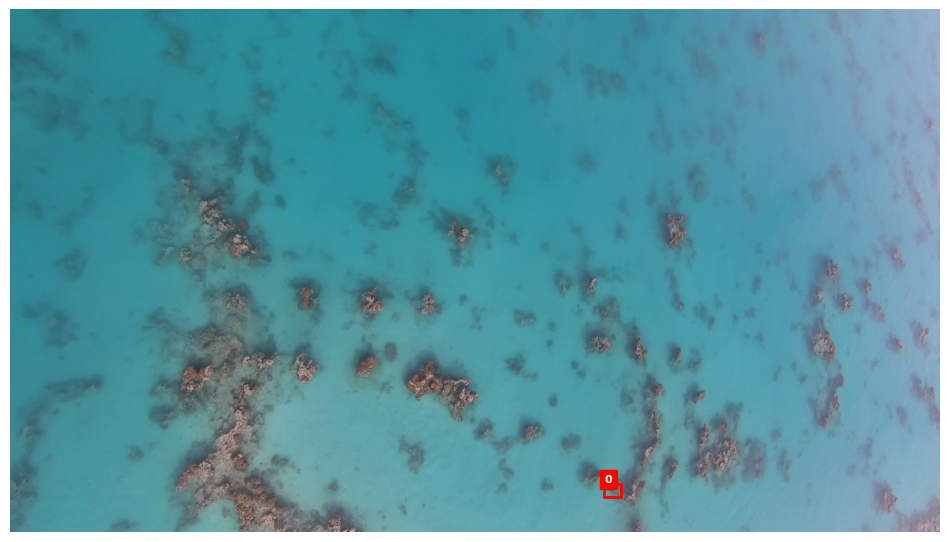

In [27]:
plot_yolo_annotation(
    image, label
)

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image

def plot_yolo_interactive(image_path, label_path, class_names=None):
    # Load image and get dimensions
    img = Image.open(image_path)
    w_img, h_img = img.size

    # Create the base image plot
    fig = px.imshow(img)

    # Read YOLO labels
    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.split()
        class_id = int(parts[0])
        x_c, y_c, w, h = map(float, parts[1:])

        # Convert normalized to pixel coordinates
        # Plotly's "shapes" use the image coordinate system (0 to width/height)
        rect_w = w * w_img
        rect_h = h * h_img
        x0 = (x_c * w_img) - (rect_w / 2)
        y0 = (y_c * h_img) - (rect_h / 2)
        x1 = x0 + rect_w
        y1 = y0 + rect_h

        # Add the bounding box as a shape
        fig.add_shape(
            type="rect",
            x0=x0, y0=y0, x1=x1, y1=y1,
            line=dict(color="red", width=3),
        )

        # Add a label trace (optional, for text on hover or display)
        label = class_names[class_id] if class_names else f"Class {class_id}"
        fig.add_trace(go.Scatter(
            x=[x0], y=[y0 - 10],
            text=[label],
            mode="text",
            textfont=dict(color="red", size=14),
            showlegend=False
        ))

    # Update layout to remove axes and enable better zooming
    fig.update_layout(dragmode='pan') # Set default drag to Pan
    fig.show()

In [3]:
plot_yolo_interactive(
    image,
    label
)